In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import date

In [2]:
c_to_f = lambda c :(9/5)*c + 32

In [14]:
#read in .xls to df
df=pd.read_excel("/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/CURRENT/8_FAR/Farallons_TEMP_1925-20230613.xls") #change excel filename
df = df[43:].reset_index().drop('index',axis=1)
df = df.rename(columns={'==================================================================================': 'year',
                        'Unnamed: 1': 'month',
                        'Unnamed: 2': 'day',
                        'Unnamed: 5': 'sst',
                       'Unnamed: 6': 'flag'})
df['date'] = pd.to_datetime(df[['year','month','day']])
df

,year,month,day,Unnamed: 3,Unnamed: 4,sst,flag,date
0,1925,5,1,NaN,NaN,12.2,NaN,1925-05-01
1,1925,5,2,NaN,NaN,11.7,NaN,1925-05-02
2,1925,5,3,NaN,NaN,11.1,NaN,1925-05-03
3,1925,5,4,NaN,NaN,11.1,NaN,1925-05-04
4,1925,5,5,NaN,NaN,11.1,NaN,1925-05-05
...,...,...,...,...,...,...,...,...
35820,2023,5,27,1157,0,11.8,0,2023-05-27
35821,2023,5,28,NaN,0,NaN,0,2023-05-28
35822,2023,5,29,1130,0,11.8,0,2023-05-29
35823,2023,5,30,1137,0,12.5,0,2023-05-30


In [4]:
df['sst']=df['sst'].astype(np.float)
df

/var/folders/69/cbrnkm0j709dqnkmhv8wnwgw0000gp/T/ipykernel_18241/1333043121.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['sst']=df['sst'].astype(np.float)


,year,month,day,Unnamed: 3,Unnamed: 4,sst,Unnamed: 6,date
0,1925,5,1,NaN,NaN,12.2,NaN,1925-05-01
1,1925,5,2,NaN,NaN,11.7,NaN,1925-05-02
2,1925,5,3,NaN,NaN,11.1,NaN,1925-05-03
3,1925,5,4,NaN,NaN,11.1,NaN,1925-05-04
4,1925,5,5,NaN,NaN,11.1,NaN,1925-05-05
...,...,...,...,...,...,...,...,...
35820,2023,5,27,1157,0,11.8,0,2023-05-27
35821,2023,5,28,NaN,0,NaN,0,2023-05-28
35822,2023,5,29,1130,0,11.8,0,2023-05-29
35823,2023,5,30,1137,0,12.5,0,2023-05-30


In [10]:
#make annual climatology and long-term mean
climatology = df.groupby(['year']).mean().reset_index()
climatology_nan = climatology
climatology = climatology.dropna(axis=0)
long_term_mean = df.sst.mean()
X = climatology.year.values.reshape(-1,1)
Y = climatology.sst.values.reshape(-1,1)
lm = LinearRegression()  # create object for the class
lm.fit(X,Y)  # perform linear regression
century_trend = (lm.coef_[0] * 100)[0]

/var/folders/69/cbrnkm0j709dqnkmhv8wnwgw0000gp/T/ipykernel_18241/474963281.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(fahrenheit_tick_labels)


TypeError: '<=' not supported between instances of 'float' and 'str'

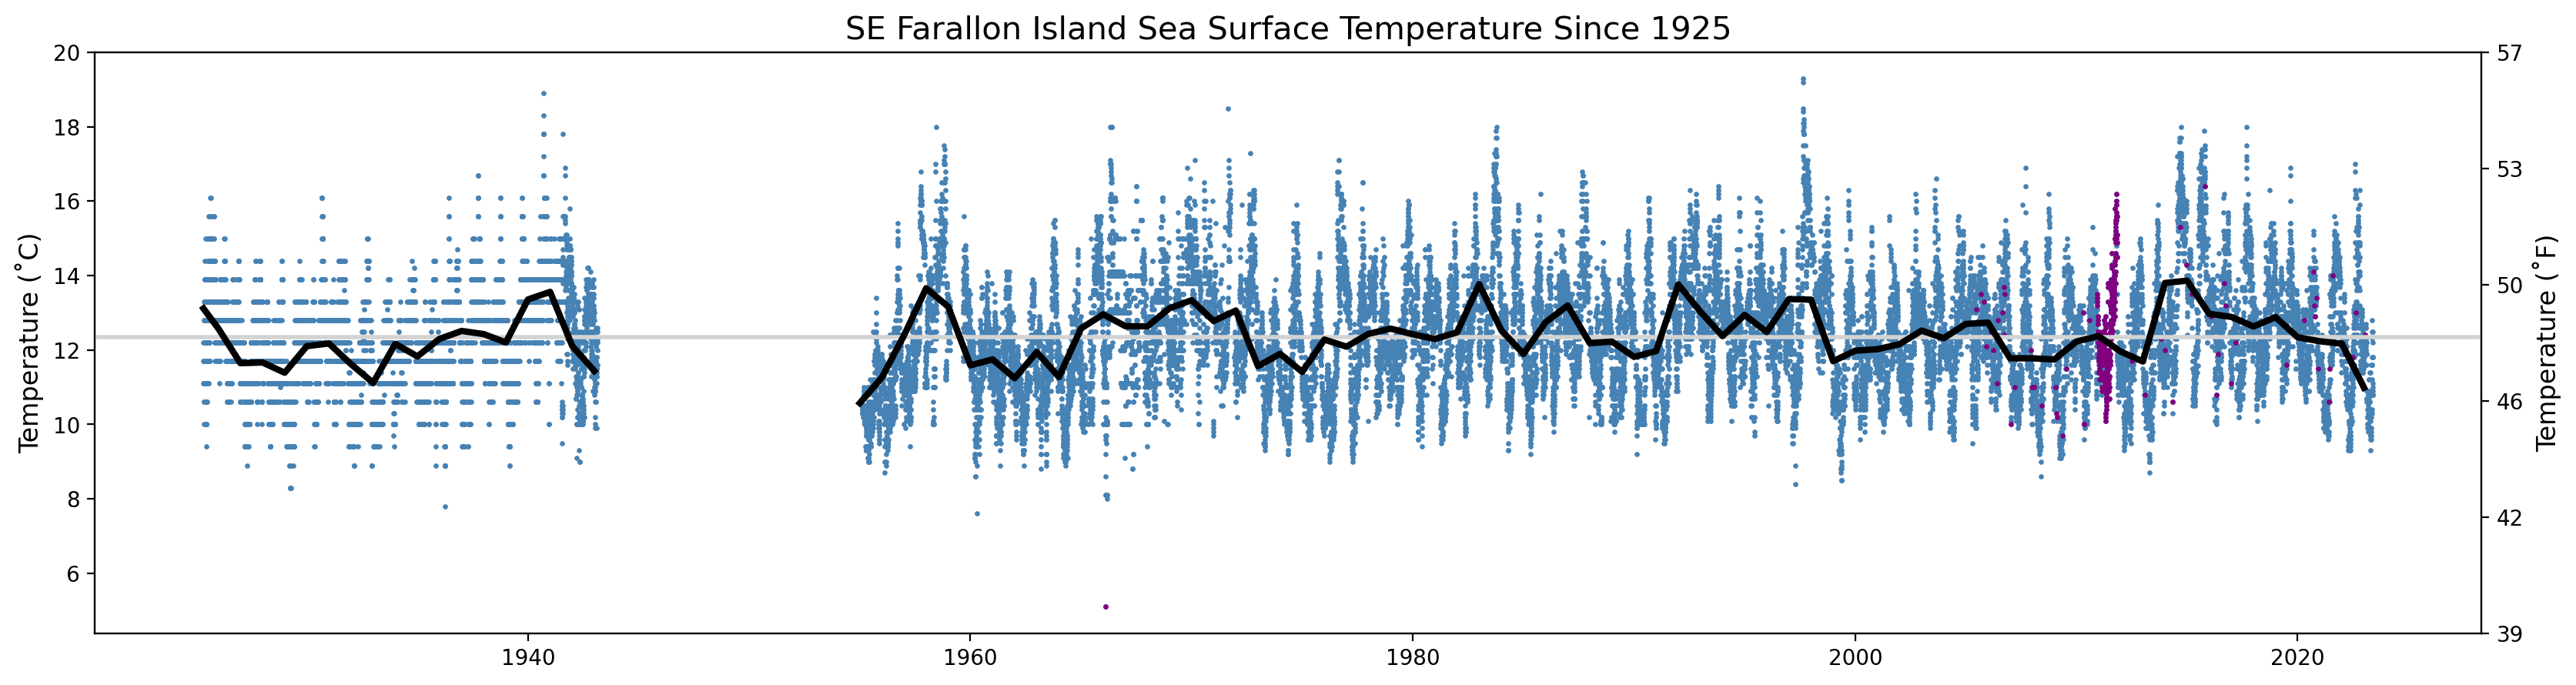

In [16]:
width = 20
height = 5
fig, ax1 = plt.subplots(figsize=(width, height), dpi=200)
#scatter_color = (171/265, 206/265, 165/265)
ax1.scatter(df.date, df.sst, s=2, color='steelblue')
ax1.scatter(df.date[df.flag > 0], df.sst[df.flag > 0], s=2, color='purple')
ax1.plot(df.groupby('year')['date'].first(), climatology_nan.sst, color='k', linewidth=3, zorder=20)
ax1.axhline(y=long_term_mean, c='lightgrey', linewidth=2, zorder=10)
#ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (˚C)', fontdict={'size':12})
location = 'SE Farallon Island Sea Surface Temperature Since 1925'
plt.title(location, fontdict={'size':15})

# Fahrenheit axis
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':12})
c_ticks = ax1.get_yticks()
fahrenheit_tick_labels = [str(int(c_to_f(tick))) for tick in c_ticks]
ax2.set_yticklabels(fahrenheit_tick_labels)

long_term_mean_f = c_to_f(long_term_mean)
century_trend_f = (9/5) * century_trend

long_term_mean_str = 'Long-term Mean: ' + str(np.round(long_term_mean, 2)) + '˚C / ' + str(np.round(long_term_mean_f, 2)) + '˚F'
trend_label = 'Century Trend: ' + str(np.round(century_trend, 2)) + '˚C / ' + str(np.round(century_trend_f, 2)) + '˚F'
ax1.text(df.date[round(len(df)*0.85)], df.sst.dropna().min(), trend_label)
ax1.legend(['Daily Measurement', 'Annual Mean', long_term_mean_str], frameon=False, fontsize=10)

fig.patch.set_facecolor('xkcd:white')

plt.savefig('FAR_timeseries.png')

In [18]:
for i

0        12.2
1        11.7
2        11.1
3        11.1
4        11.1
         ... 
35820    11.8
35821     NaN
35822    11.8
35823    12.5
35824    12.2
Name: sst, Length: 35825, dtype: object